In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier


In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [55]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
data=pd.read_csv('/content/salary.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [59]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

preprocess


In [60]:
categorical_data=data.select_dtypes( exclude='int64')


In [61]:
print(categorical_data['workclass'].unique())
print('_'*60)
print('\n')
print(categorical_data['workclass'].value_counts())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
____________________________________________________________


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


In [62]:
df_workclass=pd.get_dummies(categorical_data['workclass'])
df_workclass.drop(columns=[' ?'],inplace=True)
categorical_data=categorical_data.join(df_workclass)
categorical_data.drop(columns=['workclass'],inplace=True)

In [63]:
print(categorical_data['education'].unique())
print('_'*60)
print('\n')
print(categorical_data['education'].value_counts())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
____________________________________________________________


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


In [64]:
education_level={' Preschool':0,
                 ' 1st-4th':1,
                 ' 5th-6th' :2,
                 ' 7th-8th' :3,
                 ' 9th' :4,
                 ' 10th' : 5,
                 ' 11th' :6,
                 ' 12th' :7,
                 ' HS-grad' :8,
                 ' Prof-school' :9,
                 ' Assoc-acdm' :10,
                 ' Assoc-voc' :11,
                 ' Some-college' :12,
                 ' Bachelors' :13,
                 ' Masters' :14,
                 ' Doctorate':15}

In [65]:
categorical_data['education_level']=categorical_data['education'].map(education_level)
categorical_data['education_level'].unique()
categorical_data.drop(columns=['education'],inplace=True)

In [66]:
print(categorical_data['marital-status'].unique())
print('_'*60)
print('\n')
print(categorical_data['marital-status'].value_counts())

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
____________________________________________________________


 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64


In [67]:
df_marital_status=pd.get_dummies(categorical_data['marital-status'])
df_marital_status.drop(columns=' Married-civ-spouse',inplace=True)
categorical_data=categorical_data.join(df_marital_status)
categorical_data.drop(columns=['marital-status'],inplace=True)

In [68]:
print(categorical_data['occupation'].unique())
print('_'*60)
print('\n')
print(categorical_data['occupation'].value_counts())

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
____________________________________________________________


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


In [69]:
df_occupation=pd.get_dummies(categorical_data['occupation'])
df_occupation.drop(columns=' ?',inplace=True)
categorical_data=categorical_data.join(df_occupation)
categorical_data.drop(columns=['occupation'],inplace=True)

In [70]:
print(categorical_data['relationship'].unique())
print('_'*60)
print('\n')
print(categorical_data['relationship'].value_counts())

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
____________________________________________________________


 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64


In [71]:
df_relationship=pd.get_dummies(categorical_data['relationship'])
df_relationship.drop(columns=' Other-relative',inplace=True)
categorical_data=categorical_data.join(df_relationship)
categorical_data.drop(columns=['relationship'],inplace=True)

In [72]:
print(categorical_data['sex'].unique())
print('_'*60)
print('\n')
print(categorical_data['sex'].value_counts())

[' Male' ' Female']
____________________________________________________________


 Male      21790
 Female    10771
Name: sex, dtype: int64


In [73]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()  
categorical_data['sex']= lr.fit_transform(categorical_data['sex'])

In [74]:
print(categorical_data['race'].unique())
print('_'*60)
print('\n')
print(categorical_data['race'].value_counts())

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
____________________________________________________________


 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


In [75]:
df_race=pd.get_dummies(categorical_data['race'])
df_race.drop(columns=' Other',inplace=True)
categorical_data=categorical_data.join(df_race)
categorical_data.drop(columns=['race'],inplace=True)

In [76]:
print(categorical_data['native-country'].unique())
print('_'*60)
print('\n')
print(categorical_data['native-country'].value_counts())

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
____________________________________________________________


 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica          

In [77]:
df_native_country=pd.get_dummies(categorical_data['native-country'])
df_native_country.drop(columns=' ?',inplace=True)
categorical_data=categorical_data.join(df_native_country)
categorical_data.drop(columns=['native-country'],inplace=True)

numerical features - preprocessing

In [78]:
numerical_data=data.select_dtypes( exclude='object')
numerical_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [79]:
numerical_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [80]:
print(numerical_data.age.unique())
print('_'*60)
print('\n')
print(numerical_data.fnlwgt.nunique())
print('_'*60)
print('\n')
print(numerical_data['education-num'].unique())
print('_'*60)
print('\n')
print(numerical_data['capital-gain'].unique())
print('_'*60)
print('\n')
print(numerical_data['capital-loss'].unique())
print('_'*60)
print('\n')
print(numerical_data['hours-per-week'].unique())
print('_'*60)
print('\n')

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
____________________________________________________________


21648
____________________________________________________________


[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
____________________________________________________________


[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  

In [81]:
numerical_data=numerical_data.drop(columns=['fnlwgt','education-num'])

checking outliers


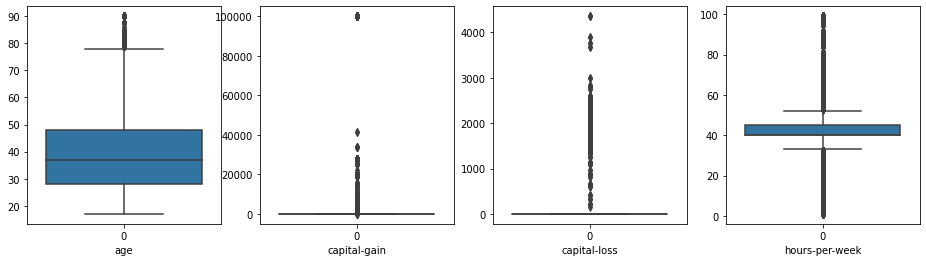

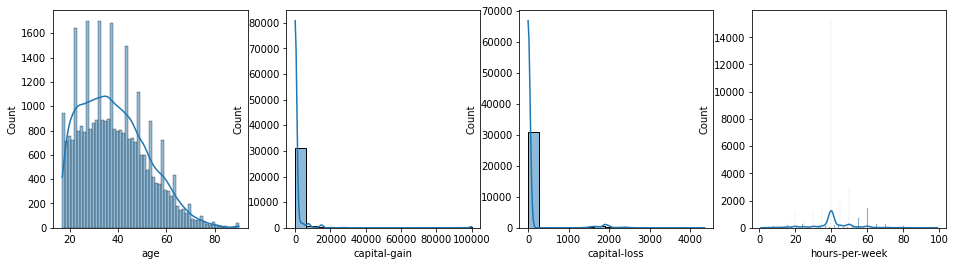

In [83]:
feat_data=['age', 'capital-gain', 'capital-loss', 'hours-per-week']

f = plt.figure(figsize=(16,4))
for i in range(4):
    f.add_subplot(1, 4, i+1)
    sns.boxplot(data=numerical_data[feat_data[i]])
    plt.xlabel(feat_data[i])
plt.show()
f = plt.figure(figsize=(16,4))
for i in range(4):
    f.add_subplot(1, 4, i+1)
    sns.histplot(data=numerical_data[feat_data[i]],kde=True)
    plt.xlabel(feat_data[i])
plt.show()

In [84]:
df_age=numerical_data['age']
df_age=pd.cut(x=df_age, bins=[10, 20, 30, 40,50,60,70,80,90,100])
df_age=df_age.astype(str)
df_age=lr.fit_transform(df_age)
numerical_data['age_bin']=df_age
numerical_data=numerical_data.drop(columns=['age'])

In [85]:
df_hpw=numerical_data['hours-per-week']
df_hpw=pd.cut(x=df_hpw, bins=[10, 20, 30, 40,50,60,70,80,90,100])
df_hpw=df_hpw.astype(str)
df_hpw=lr.fit_transform(df_hpw)
numerical_data['hpw_bin']=df_hpw
numerical_data=numerical_data.drop(columns=['hours-per-week'])

scale data

In [86]:
def scale_std(X_train,X_test):
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    return X_train_std,X_test_std

correlation

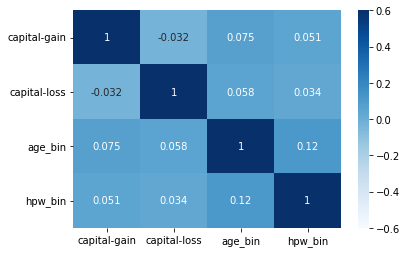

In [87]:
corrMatrix=numerical_data.corr()
corrMatrix
plt.subplot()
sns.heatmap(corrMatrix,annot=True,cmap='Blues',vmax=0.6,vmin=-0.6)

In [88]:
dataSalary=categorical_data.join(numerical_data)
y=dataSalary['salary']
X=dataSalary.drop(columns=['salary'])

train,test

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

The training dataset has 26048 records.
The testing dataset has 6513 records.


In [41]:
X_train_std,X_test_std=scale_std(X_train,X_test)

In [90]:
def plot_conf(ypred,y_test):
    cf_matrix = confusion_matrix( ypred,y_test)
    ax= plt.subplot()
    sns.heatmap(cf_matrix,annot=True,ax=ax, cmap="BuPu")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')

In [91]:
def acc_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    ypred=model.predict(X_test)
    err=accuracy_score(y_test, ypred)
    print('{}% of the test samples are corrrectly classified \n\n'.format(err*100))
    plt.figure()
    plot_conf(ypred,y_test)
    
    return err

85.18347919545525% of the test samples are corrrectly classified 




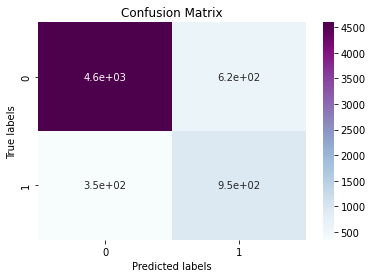

In [92]:
model=LogisticRegression()
err1=acc_model(model,X_train_std,y_train,X_test_std,y_test) 

83.35636419468754% of the test samples are corrrectly classified 




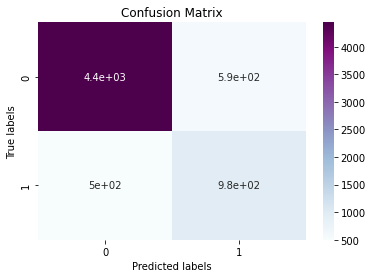

In [93]:
model=DecisionTreeClassifier()
err2=acc_model(model,X_train,y_train,X_test,y_test) 

85.29095654844157% of the test samples are corrrectly classified 




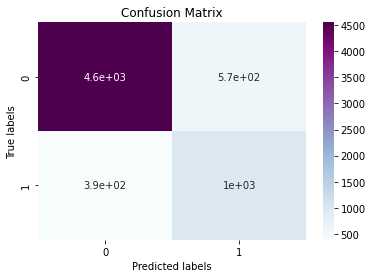

In [94]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
err3=acc_model(model,X_train,y_train,X_test,y_test)         

85.1527713803163% of the test samples are corrrectly classified 




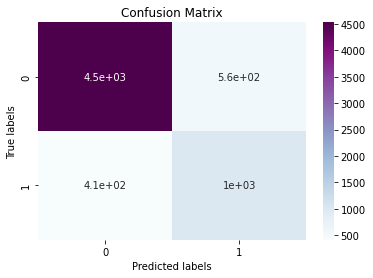

In [97]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
err5=acc_model(model,X_train,y_train,X_test,y_test)         

86.67280822969445% of the test samples are corrrectly classified 




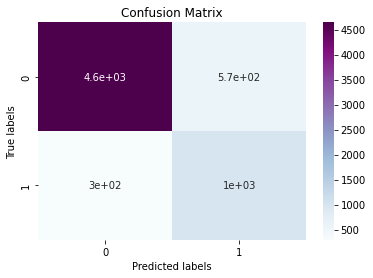

In [99]:
model=AdaBoostClassifier(n_estimators=100)
err7=acc_model(model,X_train,y_train,X_test,y_test)   

86.97988638108399% of the test samples are corrrectly classified 




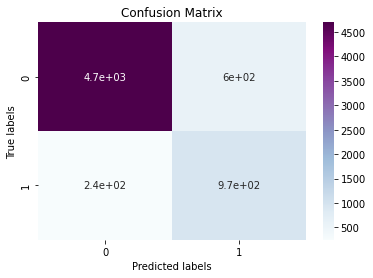

In [100]:
model=GradientBoostingClassifier(n_estimators=100)
err8=acc_model(model,X_train,y_train,X_test,y_test)   